In [1]:
# Importation de library
import os
import pandas as pd
import numpy as np
import json
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime


In [2]:
# Je me positionne dans mon repertoir de travail personnel:
os.chdir("C:\\Users\\zolboy\\Documents\\GitHub\\Machine_Learning_OpenClassrooms\\Segmentez des clients d'un site E-Commerce\\Data_files")
os.getcwd()

"C:\\Users\\zolboy\\Documents\\GitHub\\Machine_Learning_OpenClassrooms\\Segmentez des clients d'un site E-Commerce\\Data_files"

In [6]:
# Lecture des fichier csv
# Pas besoin de mettre le chhemin psq on est deja positionner dans le repertoir souhaiter:

customers = pd.read_csv('olist_customers_dataset.csv', sep=',')
geolocation = pd.read_csv('olist_geolocation_dataset.csv', sep=',')
order_items = pd.read_csv('olist_order_items_dataset.csv', sep=',')
order_payments = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
order_reviews = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
orders = pd.read_csv('olist_orders_dataset.csv', sep=',')
products = pd.read_csv('olist_products_dataset.csv', sep=',')
sellers = pd.read_csv('olist_sellers_dataset.csv', sep=',')
category_name_translate = pd.read_csv('product_category_name_translation.csv', sep=',')


In [15]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
# lets start explore our dataset unique values:

print('Nombre d etats differents :')
print(len(customers['customer_state'].unique()))
print("Nombre de ville different :")
print(len(customers.customer_city.unique()))
print('Nombre de zip code prefix differents')
print(len(customers.customer_zip_code_prefix.unique()))
print('Nombez de uniqe_id differents : ')
print(len(customers.customer_unique_id.unique()))

Nombre d etats differents :
27
Nombre de ville different :
4119
Nombre de zip code prefix differents
14994
Nombez de uniqe_id differents : 
96096


In [25]:
# Visualtisation de geolocation
print(geolocation.shape)
print(geolocation.head())

(1000163, 5)
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


In [29]:
print('Nombre d etats differents :', len(geolocation.geolocation_state.unique()))
print('Nombre de villes differentes :', len(geolocation.geolocation_city.unique()))
print('Nomber de zip_code_prefix differents :', len(geolocation.geolocation_zip_code_prefix.unique()))

Nombre d etats differents : 27
Nombre de villes differentes : 8011
Nomber de zip_code_prefix differents : 19015


In [31]:
# Visualisataion order_items :
print(order_items.shape)
print(order_items.head())

(112650, 7)
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99  

In [33]:
# Visualisation orderPayments
print(order_payments.shape)
print(order_payments.head())

(103886, 5)
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [37]:
print(products.shape)
print(products.columns)
print(products.head())

(32951, 9)
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4     

In [38]:
print(category_name_translate.shape)
print(category_name_translate.head())

(71, 2)
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


## conclure :
on constate que le dernier fichier ne set qu a obtenir une traduction de la categorie des produit. comme je comprends mieux l'anglais que le portugais. je decide de remplacer les valeur de la colonne concernée.

In [40]:
# Changer les noms de produit par un nom en anglais
categs = products['product_category_name'].unique()
print('Nombre de  categories dans le tableau products', len(categs))
categs_translated = category_name_translate['product_category_name'].unique()
print("Nombez de categories dans le tableau category_name_translation:", len(categs_translated))



Nombre de  categories dans le tableau products 74
Nombez de categories dans le tableau category_name_translation: 71


In [41]:
#iteration sur chaque row pour le modifier avec le nom traduit en eng

for category_name in categs:
    if category_name not in categs_translated:
        print('- la categorie', category_name,' n est pas traduit')

- la categorie nan  n est pas traduit
- la categorie pc_gamer  n est pas traduit
- la categorie portateis_cozinha_e_preparadores_de_alimentos  n est pas traduit


In [42]:
print('on a ', len(products[products['product_category_name'].isna()]), ' produits dont la categorie n est renseignee')

on a  610  produits dont la categorie n est renseignee


In [43]:
# j'ajoute les traduction manquantes dans le tableau de traduction :
# ajouter a la fin de dataset category_translate 

category_name_translate.loc[len(category_name_translate) + 1] = [
    'portateis_cozinha_e_preparadores_de_alimentos',
    "kitchen_laptops_and_food_preparers"
]
category_name_translate.loc[len(category_name_translate) + 1] = [
    'pc_gamer',
    'pc_gamer'
]


In [46]:
# Ajout d'un valeur par defaut pour les nan
translation = {
    np.nan : 'misc'
}

# Change the nan value with misc.

for i in category_name_translate.index:
    translation[category_name_translate['product_category_name'][i]] = \
        category_name_translate['product_category_name_english'][i]



In [48]:
category_name_translate.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 72, 73],
           dtype='int64')

In [49]:
# je remplace la categorie en portugais par sa traduction en englais :
products['product_category_name'] = \
    products['product_category_name'].map(translation, na_action=None)
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [50]:
customer_states = customers['customer_state'].unique()
customer_states.sort()

print(customer_states)

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


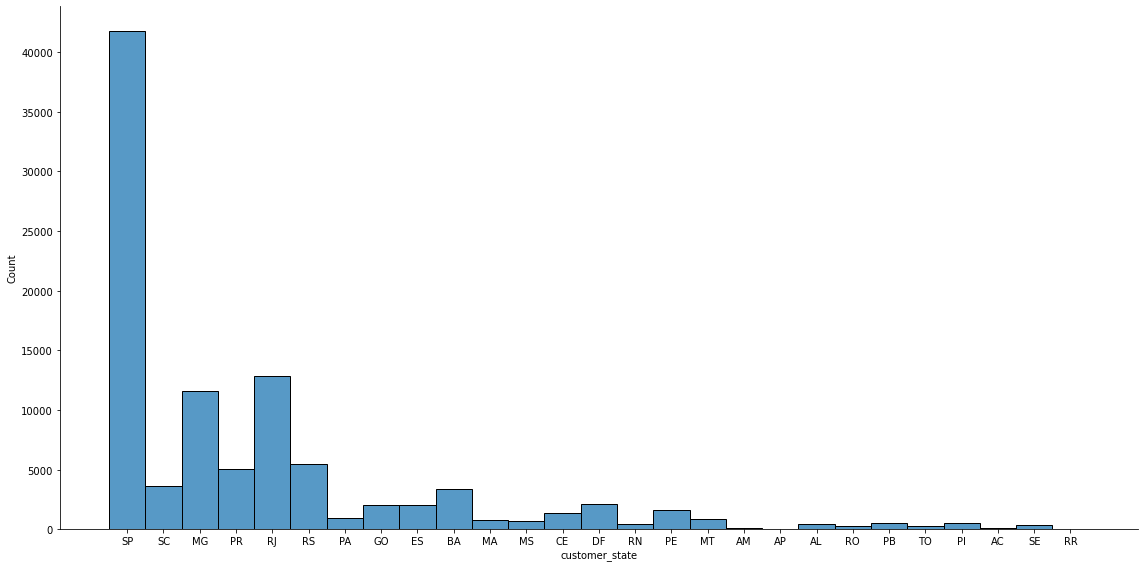

In [51]:
sns.displot(customers, x='customer_state', height=8, aspect=2)

In [58]:
br_states_geojson = open('data')
br_states = json.load(br_states_geojson)



PermissionError: [Errno 13] Permission denied: 'data'

In [54]:
def ratio_to_color(ratio):
    """Méthode qui converti un ratio entre 0 & 1
       en couleur (valeur hexadécimale)"""
    color_tuple = cm.YlOrRd(ratio)[:3]
    return ('#{:02X}{:02X}{:02X}').format(
        int(color_tuple[0] * 255),
        int(color_tuple[1] * 255),
        int(color_tuple[2] * 255)
    )


In [57]:


# d'après la distribution ci-dessus, c'est l'état "SP"
# qui a le max de clients
max_clients = len(customers[customers['customer_state'] == 'SP'])

fig = go.Figure(go.Scattermapbox())
layers = []
for state in br_states['features']:
    nb_clients = len(customers[
        customers['customer_state'] == state['properties']['sigla']
    ])
    print(state['properties']['sigla'], state['properties']['name'],
          "- nb clients =", nb_clients)
    layers.append({'source': state,
                   'type':"fill",
                   'below':"traces",
                   'color':ratio_to_color(nb_clients / max_clients),
                   })
fig.update_layout(
    width=600,
    height=550,
    mapbox = {
        'style': "carto-positron",
        'center': { 'lat': -15, 'lon': -54 },
        'zoom': 3,
        'layers': layers
    },
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)
fig.update(layout_coloraxis_showscale=True)
fig.update_coloraxes(showscale=True)
fig.show()

TypeError: list indices must be integers or slices, not str

# Segmentation client - RFM + Satisfaction + Categories.
## Creation d'une base de donnees RFM + Satisfaction + Categories 

In [3]:
import pandas as pd 
olist_customers_dataset = pd.read_csv('olist_customers_dataset.csv', sep=',')
olist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv', sep=',')
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv', sep=',')
olist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
olist_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv', sep=',')
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv', sep=',')
olist_products_dataset = pd.read_csv('olist_products_dataset.csv', sep=',')
olist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv', sep=',')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv', sep=',')


In [4]:
All_Datasets = {'olist_customers_dataset' : olist_customers_dataset, 'olist_geolocation_dataset' : olist_geolocation_dataset, 'olist_order_items_dataset' : olist_order_items_dataset, 'olist_order_payments_dataset' : olist_order_payments_dataset, 'olist_order_reviews_dataset' : olist_order_reviews_dataset, 'olist_orders_dataset' : olist_orders_dataset, 'olist_products_dataset' : olist_products_dataset, 'olist_sellers_dataset' : olist_sellers_dataset, 'product_category_name_translation' : product_category_name_translation}


In [5]:
# Merge Different Dataframes 

Data1 = pd.merge(olist_customers_dataset, olist_orders_dataset)
Data1 = pd.merge(Data1, olist_orders_dataset)
Data2 = pd.merge(olist_order_payments_dataset, olist_order_items_dataset)
Data2 = pd.merge(Data2, olist_order_reviews_dataset)
Data = pd.merge(Data1, Data2)
Data = pd.merge(Data, olist_products_dataset)
Data = pd.merge(Data, olist_sellers_dataset)


In [6]:
# Drop Duplicate Orders :
Data.drop_duplicates(subset='order_id', keep= False, inplace = True)


In [7]:
Data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [8]:
Data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-03-28 18:23:51,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
6,fbd40c083aa8cddebb5265b2ba6aaf2e,f40ab89b622248b7ca125af4b486b887,32341,contagem,MG,e0b26f14d2bcc710bb02f77a4628763b,delivered,2017-05-16 10:00:49,2017-05-17 03:45:27,2017-05-23 10:35:48,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP


In [9]:
# Creation d'une base de donnees avec RFM + Satisfaction + Variable Binaires D'appartenance a chaque categorie
from datetime import datetime
from datetime import date 
Data['order_delivered_customer_date'] = pd.to_datetime(Data['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')


In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85133 entries, 0 to 117326
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    85133 non-null  object        
 1   customer_unique_id             85133 non-null  object        
 2   customer_zip_code_prefix       85133 non-null  int64         
 3   customer_city                  85133 non-null  object        
 4   customer_state                 85133 non-null  object        
 5   order_id                       85133 non-null  object        
 6   order_status                   85133 non-null  object        
 7   order_purchase_timestamp       85133 non-null  object        
 8   order_approved_at              85120 non-null  object        
 9   order_delivered_carrier_date   84281 non-null  object        
 10  order_delivered_customer_date  83282 non-null  datetime64[ns]
 11  order_estimate

In [11]:
# Do a RFM dataframe(recency, Frequency, Amount) + Mean Review + Main Categories.
Data = Data.dropna(subset=['order_delivered_customer_date'])
Data.drop_duplicates(subset = "order_id", keep = False, inplace = True)
UniqueIndividuals = Data.customer_unique_id.unique()


In [12]:
# Count for each individual, the number of orders, the date of the last order

print(len(UniqueIndividuals))
List = []

for i in range(len(UniqueIndividuals)):
    Blank = []
    Blank.append(UniqueIndividuals[i])
    Blank.append(Data['order_delivered_customer_date'][Data["customer_unique_id"] == UniqueIndividuals[i]].max())
    Blank.append(len(Data[Data["customer_unique_id"] == UniqueIndividuals[i]]))
    Blank.append(Data['price'][Data["customer_unique_id"] == UniqueIndividuals[i]].sum())
    Blank.append(Data['review_score'][Data["customer_unique_id"] == UniqueIndividuals[i]].mean())
    Blank.append(Data['customer_city'][Data["customer_unique_id"] == UniqueIndividuals[i]].iloc[-1])
    Blank.append(Data['customer_state'][Data["customer_unique_id"] == UniqueIndividuals[i]].iloc[-1])
    Blank.append(Data['payment_type'][Data["customer_unique_id"] == UniqueIndividuals[i]].iloc[-1])
    Blank.append(Data['product_category_name'][Data["customer_unique_id"] == UniqueIndividuals[i]].iloc[-1])
    List.append(Blank)
    if i%1000 == 0:
        print(i)
    


81317
0
1000


In [ ]:
# Create Empty DataFrame with only Indiviiduals and their 'customer_unique_id'
Individuals = pd.DataFrame(List, columns = ['customer_unique_id', 'Recency', 'Frequency', 'Amount', 'Mean_review_score', 'City', 'State', 'Payment_Type', 'Category'])
        
Individuals.to_csv('IndividualsRFM_Categories.csv')
